In [1]:
from clustering import *

In [2]:
sample_size = [250,500,750,1000,1500,2000]
protein_traj = '../proteinG_3gb1/yhalfres_0_0/trajectory.00.dcd'
pdb_file = '../proteinG_3gb1/3GB1.pdb'
time = []

In [3]:
### feature generation
for sam_size in sample_size:
    temp_time = []
    for rep_time in range(10):
        inp = feature(protein_traj,pdb_file,sieve_res=2,random=sam_size)
        simi_matrix, all_time = binary_simi_matrix(inp)
       # tree, hie_tree, dic, all_time = agglomerative(inp, simi_matrix)
        temp_time.append(round(all_time,4))
        if rep_time % 3 == 0:
            print('repeat',rep_time,'done')
    time.append(temp_time)
    print('{}'.format(sam_size), 'done')


repeat 0 done
repeat 3 done
repeat 6 done
repeat 9 done
250 done
repeat 0 done
repeat 3 done
repeat 6 done
repeat 9 done
500 done
repeat 0 done
repeat 3 done
repeat 6 done
repeat 9 done
750 done
repeat 0 done
repeat 3 done
repeat 6 done
repeat 9 done
1000 done
repeat 0 done
repeat 3 done
repeat 6 done
repeat 9 done
1500 done
repeat 0 done
repeat 3 done
repeat 6 done
repeat 9 done
2000 done


In [4]:
time_array = np.array(time)
time_ave = np.average(time_array,axis=1)
time_std = np.std(time,axis=1)
print(time_ave)
print(time_std)

[ 0.28046  1.21125  2.74019  4.83784 11.28823 19.83826]
[0.00594882 0.02018491 0.02820367 0.01921251 0.03483171 0.07587153]


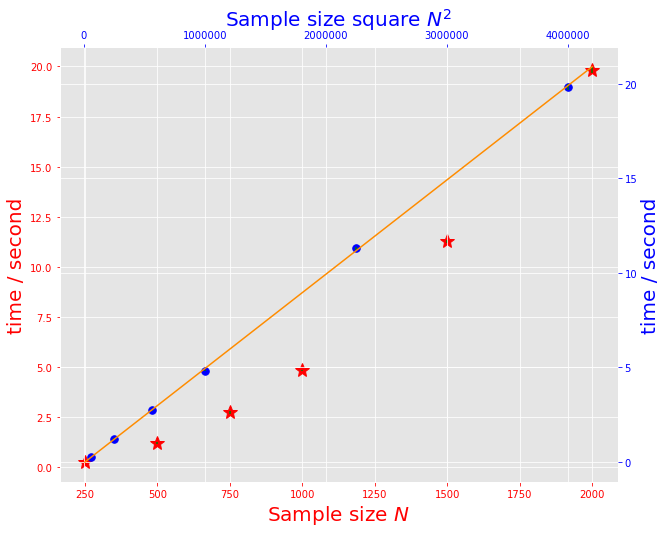

In [7]:
from sklearn import linear_model
plt.style.use('ggplot')

x=np.array([4,6,8,10]).reshape((-1, 1))
y=np.array([0.89,1.13,1.38,1.64])


x_values1=np.array(sample_size)
y_values1=time_ave

x_values2=np.array(sample_size)**2 
y_values2=time_ave
regr = linear_model.LinearRegression()
regr.fit(x_values2.reshape((-1, 1)),y_values2)

x_pred = np.array([100**2,400**2,800**2, 1200**2, 1600**2, 1800**2,2050**2]).reshape((-1, 1))
y_pred = regr.predict(x_pred)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

#ax.scatter(x_values1, y_values1)
ax.set_xlabel(r"Sample size $N$", color="r" ,fontsize=20)
ax.set_ylabel("time / second", color="r", fontsize=20)
ax.errorbar(x_values1, y_values1, 2*time_std, linestyle='None', marker='*',markersize=15,color='r',ecolor='g',barsabove=True)
ax.tick_params(axis='x', colors="r")
ax.tick_params(axis='y', colors="r")
#ax2.scatter(x_values2, y_values2,linewidths=5, color="b")
ax2.errorbar(x_values2, y_values2, 2*time_std, linestyle='None', marker='.',markersize=15,color='b',ecolor='g',barsabove=True)
ax2.plot(x_pred, y_pred, color="darkorange")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(r'Sample size square $N^2$', color="b", fontsize=20) 
ax2.set_ylabel('time / second', color="b",fontsize=20)       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="b")
ax2.tick_params(axis='y', colors="b")
ax2.ticklabel_format(style='plain',axis='x')
# ax.set_yticks(np.linspace(0,320,10))
# ax2.set_yticks(np.linspace(0,320,10))
plt.savefig('Initialization_speed_test.png')
